In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG
from ray.tune.logger import pretty_print


In [19]:
# ray.init(num_cpus=3, ignore_reinit_error=True, log_to_driver=False)


In [20]:
# config = DEFAULT_CONFIG.copy()
# config['num_workers'] = 3
# config['num_sgd_iter'] = 30
# config['sgd_minibatch_size'] = 1024
# config['model']['fcnet_hiddens'] = [100, 100]
# config['num_cpus_per_worker'] = 0  # This avoids running out of resources in the notebook environment when this cell is re-executed

# agent = PPOTrainer(config, 'CartPole-v0')


In [21]:
# for i in range(20):
#     result = agent.train()
#     print(pretty_print(result))


In [22]:
# checkpoint_path = agent.save()
# print(checkpoint_path)


In [23]:
# trained_config = config.copy()

# test_agent = PPOTrainer(trained_config, 'CartPole-v0')
# test_agent.restore(checkpoint_path)


In [24]:
# env = gym.make('CartPole-v0')
# state = env.reset()
# done = False
# cumulative_reward = 0

# while not done:
#     action = test_agent.compute_action(state)
#     state, reward, done, _ = env.step(action)
#     cumulative_reward += reward

# print(cumulative_reward)


In [25]:
# tensorboard --logdir=~/ray_results --host=0.0.0.0

In [26]:
import random

import ta
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensortrade.env.default as default
from tensortrade.feed.core import Stream, DataFeed, NameSpace
from tensortrade.oms.exchanges import Exchange
from tensortrade.oms.services.execution.simulated import execute_order
from tensortrade.oms.instruments import USD, BTC, ETH
from tensortrade.oms.wallets import Wallet, Portfolio
from tensortrade.agents import A2CAgent
import tensortrade.stochastic as sp 
from tensortrade.oms.instruments import Instrument
from tensortrade.env.default.actions import SimpleOrders, BSH, ManagedRiskOrders
from collections import OrderedDict
from tensortrade.oms.orders.criteria import Stop, StopDirection
from tensortrade.env.default.actions import ManagedRiskOrders
from tensortrade.env.default.rewards import RiskAdjustedReturns, SimpleProfit
from scipy.signal import savgol_filter


In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
dfs = []

for dirname, _, filenames in os.walk('archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_json(os.path.join(dirname, filename))
        if not df.empty and len(df) >= 51197:
            df.columns = ["unix", "open", "high", "low", "close", "volume"]
            df.drop(columns=["unix"], inplace=True)
            dfs.append(df)
        else:
            print("empty or small")
            

archive/ALICE_USDT-15m.json
empty or small
archive/BNT_USDT-15m.json
empty or small
archive/BTC_USDT-15m.json
archive/BNB_USDT-15m.json
archive/ETC_USDT-15m.json
archive/BCH_USDT-15m.json
archive/EOS_USDT-15m.json
archive/PAXG_USDT-15m.json
empty or small
archive/ICX_USDT-15m.json
archive/NANO_USDT-15m.json
archive/ZEC_USDT-15m.json
archive/OMG_USDT-15m.json
archive/LTC_USDT-15m.json
archive/DOT_USDT-15m.json
empty or small
archive/ATOM_USDT-15m.json
archive/XMR_USDT-15m.json
archive/WAVES_USDT-15m.json
archive/NEO_USDT-15m.json
archive/ETH_USDT-15m.json
archive/ENJ_USDT-15m.json
archive/ADA_USDT-15m.json
archive/XRP_USDT-15m.json
archive/LINK_USDT-15m.json


In [28]:
numCoins = 4
def fetchTaFeatures(data):
    data = ta.add_all_ta_features(data, 'open', 'high', 'low', 'close', 'volume', fillna=True)
    data.columns = [name.lower() for name in data.columns]
    return data

def createEnv(config):
#     print(config)

    coins = ["coin{}".format(x) for x in range(numCoins)]
    bitfinex_streams = []

    with NameSpace("bitfinex"):
        for coin in coins:
            coinColumns = filter(lambda name: name.startswith(coin), config["data"].columns)
            bitfinex_streams += [
                Stream.source(list(config["data"][c]), dtype="float").rename(c) for c in coinColumns
            ]


    feed = DataFeed(bitfinex_streams)
    
    streams = []
    for coin in coins:
         streams.append(Stream.source(list(data[coin+":"+"close"]), dtype="float").rename("USD-"+coin))
    streams = tuple(streams)


    bitstamp = Exchange("bitfinex", service=execute_order)(
        Stream.source(list(config["data"]["coin0:close"]), dtype="float").rename("USD-TTC0"),
        Stream.source(list(config["data"]["coin1:close"]), dtype="float").rename("USD-TTC1"),
        Stream.source(list(config["data"]["coin2:close"]), dtype="float").rename("USD-TTC2"),
        Stream.source(list(config["data"]["coin3:close"]), dtype="float").rename("USD-TTC3"),
#         Stream.source(list(data["coin4:close"]), dtype="float").rename("USD-TTC4"),
#         Stream.source(list(data["coin5:close"]), dtype="float").rename("USD-TTC5"),
#         Stream.source(list(data["coin6:close"]), dtype="float").rename("USD-TTC6"),
#         Stream.source(list(data["coin7:close"]), dtype="float").rename("USD-TTC7"),
#         Stream.source(list(data["coin8:close"]), dtype="float").rename("USD-TTC8"),
#         Stream.source(list(data["coin9:close"]), dtype="float").rename("USD-TTC9"),

#         Stream.source(list(data["coin10:close"]), dtype="float").rename("USD-TTC10"),
#         Stream.source(list(data["coin11:close"]), dtype="float").rename("USD-TTC11"),
#         Stream.source(list(data["coin12:close"]), dtype="float").rename("USD-TTC12"),
#         Stream.source(list(data["coin13:close"]), dtype="float").rename("USD-TTC13"),
#         Stream.source(list(data["coin14:close"]), dtype="float").rename("USD-TTC14"),
#         Stream.source(list(data["coin15:close"]), dtype="float").rename("USD-TTC15"),
#         Stream.source(list(data["coin16:close"]), dtype="float").rename("USD-TTC16"),
#         Stream.source(list(data["coin17:close"]), dtype="float").rename("USD-TTC17"),
#         Stream.source(list(data["coin18:close"]), dtype="float").rename("USD-TTC18"),
        
    )
    instruments = []
    assets = []
    for i, coin in enumerate(coins):
        instrument = Instrument(f"TTC{i}", 8, f"TensorTrade Coin{i}")
        instruments.append(instrument)
        assets.append(Wallet(bitstamp, 0 * instrument))

    
    cash = Wallet(bitstamp, 1000 * USD)


    portfolio = Portfolio(USD, [cash] + assets)

#     portfolio = Portfolio(USD, [cash, asset, asset1     
#     ])
# https://tensortradex.readthedocs.io/en/latest/api/tensortrade.actions.managed_risk_orders.html
#     reward = RiskAdjustedReturns(return_algorithm = "sortino", window_size=1)
    reward = SimpleProfit()

    action_scheme = ManagedRiskOrders(stop=[0.2], trade_sizes=[4], take=[0.05, 0.1, 0.04, 0.01, 0.02])
    env = default.create(
      feed=feed,
      portfolio=portfolio,
      action_scheme=action_scheme,
      reward_scheme=reward,
      window_size=config["window_size"]
    )
    
    return env


In [29]:
from scipy.signal import savgol_filter

coins = ["coin{}".format(x) for x in range(numCoins)]
dfFinal = []
for i, df in enumerate(dfs[:numCoins]):
    coin = coins[i]
    for column in ["close", "open", "high", "low", "volume"]:
        df[f"diff_{column}"] = df[f"{column}"].apply(np.log).diff().dropna()
        df[f"soft_{column}"] = savgol_filter(df[column], 35, 2)
        

#     ta.add_all_ta_features(
#     df,
#     **{k: k for k in ['open', 'high', 'low', 'close', 'volume']})
    # testar ta normal e ta no soft
    dfFinal.append(df.add_prefix(f"{coin}:"))

data = pd.concat(dfFinal, axis=1)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0.5, 1.5))
# # def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

# data = clean_dataset(data)
data = data.reset_index(drop=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# data[data.columns] = scaler.fit_transform(data)

In [37]:
from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG
# from ray.rllib.agents.impala import DEFAULT_CONFIG, ImpalaTrainer

config = DEFAULT_CONFIG.copy()
config['model']["use_lstm"] = True
# config['model']["max_seq_len"] = 32
# config['model']["lstm_cell_size"]= 256
# config['model']["lstm_use_prev_reward"]=True
# config['num_workers'] = 3
# config['num_sgd_iter'] = 30
# config['sgd_minibatch_size'] = 30
# config['model']['fcnet_hiddens'] = [100, 100]
# config['num_cpus_per_worker'] = 0  # This avoids running out of resources in the notebook environment when this cell is re-executed
# config['vf_clip_param'] = 30
# config['train_batch_size']= 30


In [31]:
config

{'num_workers': 2,
 'num_envs_per_worker': 1,
 'create_env_on_driver': False,
 'rollout_fragment_length': 200,
 'batch_mode': 'truncate_episodes',
 'train_batch_size': 4000,
 'model': {'_use_default_native_models': False,
  'fcnet_hiddens': [256, 256],
  'fcnet_activation': 'tanh',
  'conv_filters': None,
  'conv_activation': 'relu',
  'post_fcnet_hiddens': [],
  'post_fcnet_activation': 'relu',
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': False,
  'use_lstm': True,
  'max_seq_len': 32,
  'lstm_cell_size': 256,
  'lstm_use_prev_action': False,
  'lstm_use_prev_reward': False,
  '_time_major': False,
  'use_attention': False,
  'attention_num_transformer_units': 1,
  'attention_dim': 64,
  'attention_num_heads': 1,
  'attention_head_dim': 32,
  'attention_memory_inference': 50,
  'attention_memory_training': 50,
  'attention_position_wise_mlp_dim': 32,
  'attention_init_gru_gate_bias': 2.0,
  'attention_use_n_prev_actions': 0,
  'attention_use_n_prev_rewards

In [32]:
norm_data = data

In [33]:
# del config["data"]

In [17]:
# ray.init()
from ray.tune.registry import register_env

register_env("TradingEnv", createEnv)
config["env_config"]["data"]=norm_data
config["env_config"]["window_size"]=10

agent = PPOTrainer(config, 'TradingEnv')


2021-07-06 09:17:10,847	INFO trainer.py:671 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-07-06 09:17:10,848	INFO trainer.py:698 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_in (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [(None, 1)]          0           seq_in[0][0]                     
____________________________________________________________________________________________

2021-07-06 09:17:31,471	INFO trainable.py:104 -- Trainable.setup took 20.761 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-07-06 09:17:31,474	WARNING util.py:53 -- Install gputil for GPU system monitoring.


In [18]:
for i in range(50):
    result = agent.train()
    print(pretty_print(result))


agent_timesteps_total: 4000
custom_metrics: {}
date: 2021-07-06_09-19-08
done: false
episode_len_mean: .nan
episode_media: {}
episode_reward_max: .nan
episode_reward_mean: .nan
episode_reward_min: .nan
episodes_this_iter: 0
episodes_total: 0
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 0.20000000298023224
        cur_lr: 4.999999873689376e-05
        entropy: 3.6364643573760986
        entropy_coeff: 0.0
        kl: 0.04399183392524719
        model: {}
        policy_loss: -0.13473521173000336
        total_loss: -0.12228156626224518
        vf_explained_var: -0.4977198541164398
        vf_loss: 0.00365527905523777
  num_agent_steps_sampled: 4000
  num_agent_steps_trained: 4000
  num_steps_sampled: 4000
  num_steps_trained: 4000
iterations_since_restore: 1
node_ip: 192.168.0.15
num_healthy_workers: 2
off_policy_estimator: {}
perf:
  cpu_util_percent: 89.01007194244605
  ra

agent_timesteps_total: 28000
custom_metrics: {}
date: 2021-07-06_09-29-18
done: false
episode_len_mean: .nan
episode_media: {}
episode_reward_max: .nan
episode_reward_mean: .nan
episode_reward_min: .nan
episodes_this_iter: 0
episodes_total: 0
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 1.5187499523162842
        cur_lr: 4.999999873689376e-05
        entropy: 3.535214424133301
        entropy_coeff: 0.0
        kl: 0.019405603408813477
        model: {}
        policy_loss: -0.15024806559085846
        total_loss: -0.11861623823642731
        vf_explained_var: -0.7679751515388489
        vf_loss: 0.002159563824534416
  num_agent_steps_sampled: 28000
  num_agent_steps_trained: 28000
  num_steps_sampled: 28000
  num_steps_trained: 28000
iterations_since_restore: 7
node_ip: 192.168.0.15
num_healthy_workers: 2
off_policy_estimator: {}
perf:
  cpu_util_percent: 78.6951219512195


agent_timesteps_total: 52000
custom_metrics: {}
date: 2021-07-06_09-41-40
done: false
episode_len_mean: .nan
episode_media: {}
episode_reward_max: .nan
episode_reward_mean: .nan
episode_reward_min: .nan
episodes_this_iter: 0
episodes_total: 0
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.4932808876037598
        entropy_coeff: 0.0
        kl: 0.013356160372495651
        model: {}
        policy_loss: -0.14708316326141357
        total_loss: -0.11458097398281097
        vf_explained_var: -0.470047265291214
        vf_loss: 0.002075171796604991
  num_agent_steps_sampled: 52000
  num_agent_steps_trained: 52000
  num_steps_sampled: 52000
  num_steps_trained: 52000
iterations_since_restore: 13
node_ip: 192.168.0.15
num_healthy_workers: 2
off_policy_estimator: {}
perf:
  cpu_util_percent: 70.91030927835052

agent_timesteps_total: 76000
custom_metrics: {}
date: 2021-07-06_09-58-25
done: false
episode_len_mean: .nan
episode_media: {}
episode_reward_max: .nan
episode_reward_mean: .nan
episode_reward_min: .nan
episodes_this_iter: 0
episodes_total: 0
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.4653847217559814
        entropy_coeff: 0.0
        kl: 0.01238240860402584
        model: {}
        policy_loss: -0.11440712958574295
        total_loss: -0.0845009833574295
        vf_explained_var: -0.5264458060264587
        vf_loss: 0.0016974672907963395
  num_agent_steps_sampled: 76000
  num_agent_steps_trained: 76000
  num_steps_sampled: 76000
  num_steps_trained: 76000
iterations_since_restore: 19
node_ip: 192.168.0.15
num_healthy_workers: 2
off_policy_estimator: {}
perf:
  cpu_util_percent: 80.24807692307692

agent_timesteps_total: 100000
custom_metrics: {}
date: 2021-07-06_10-18-30
done: false
episode_len_mean: .nan
episode_media: {}
episode_reward_max: .nan
episode_reward_mean: .nan
episode_reward_min: .nan
episodes_this_iter: 0
episodes_total: 0
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.38265061378479
        entropy_coeff: 0.0
        kl: 0.015221665613353252
        model: {}
        policy_loss: -0.14253821969032288
        total_loss: -0.10519733279943466
        vf_explained_var: 0.2808285057544708
        vf_loss: 0.0026640230789780617
  num_agent_steps_sampled: 100000
  num_agent_steps_trained: 100000
  num_steps_sampled: 100000
  num_steps_trained: 100000
iterations_since_restore: 25
node_ip: 192.168.0.15
num_healthy_workers: 2
off_policy_estimator: {}
perf:
  cpu_util_percent: 70.9195439739

agent_timesteps_total: 120000
custom_metrics: {}
date: 2021-07-06_10-28-25
done: false
episode_len_mean: 36425.333333333336
episode_media: {}
episode_reward_max: 2.799390616673324
episode_reward_mean: 0.9341094029073039
episode_reward_min: -0.6275862806873393
episodes_this_iter: 1
episodes_total: 3
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.4475085735321045
        entropy_coeff: 0.0
        kl: 0.01663333550095558
        model: {}
        policy_loss: -0.1617010235786438
        total_loss: -0.11916829645633698
        vf_explained_var: -0.33341896533966064
        vf_loss: 0.004639922175556421
  num_agent_steps_sampled: 120000
  num_agent_steps_trained: 120000
  num_steps_sampled: 120000
  num_steps_trained: 120000
iterations_since_restore: 30
node_ip: 192.168.0.15
num_healthy_workers: 2
off_pol

agent_timesteps_total: 140000
custom_metrics: {}
date: 2021-07-06_10-39-38
done: false
episode_len_mean: 36425.333333333336
episode_media: {}
episode_reward_max: 2.799390616673324
episode_reward_mean: 0.9341094029073039
episode_reward_min: -0.6275862806873393
episodes_this_iter: 0
episodes_total: 3
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.341752767562866
        entropy_coeff: 0.0
        kl: 0.01614585518836975
        model: {}
        policy_loss: -0.15755116939544678
        total_loss: -0.11772286891937256
        vf_explained_var: -0.6834304928779602
        vf_loss: 0.0030460203997790813
  num_agent_steps_sampled: 140000
  num_agent_steps_trained: 140000
  num_steps_sampled: 140000
  num_steps_trained: 140000
iterations_since_restore: 35
node_ip: 192.168.0.15
num_healthy_workers: 2
off_pol

agent_timesteps_total: 160000
custom_metrics: {}
date: 2021-07-06_10-52-14
done: false
episode_len_mean: 36425.333333333336
episode_media: {}
episode_reward_max: 2.799390616673324
episode_reward_mean: 0.9341094029073039
episode_reward_min: -0.6275862806873393
episodes_this_iter: 0
episodes_total: 3
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.312380790710449
        entropy_coeff: 0.0
        kl: 0.016216952353715897
        model: {}
        policy_loss: -0.14881592988967896
        total_loss: -0.10934530198574066
        vf_explained_var: -0.6474730372428894
        vf_loss: 0.002526385709643364
  num_agent_steps_sampled: 160000
  num_agent_steps_trained: 160000
  num_steps_sampled: 160000
  num_steps_trained: 160000
iterations_since_restore: 40
node_ip: 192.168.0.15
num_healthy_workers: 2
off_pol

agent_timesteps_total: 180000
custom_metrics: {}
date: 2021-07-06_11-06-06
done: false
episode_len_mean: 36425.333333333336
episode_media: {}
episode_reward_max: 2.799390616673324
episode_reward_mean: 0.9341094029073039
episode_reward_min: -0.6275862806873393
episodes_this_iter: 0
episodes_total: 3
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.324925184249878
        entropy_coeff: 0.0
        kl: 0.014740847051143646
        model: {}
        policy_loss: -0.15540161728858948
        total_loss: -0.11969882249832153
        vf_explained_var: -0.6431223750114441
        vf_loss: 0.0021212706342339516
  num_agent_steps_sampled: 180000
  num_agent_steps_trained: 180000
  num_steps_sampled: 180000
  num_steps_trained: 180000
iterations_since_restore: 45
node_ip: 192.168.0.15
num_healthy_workers: 2
off_po

agent_timesteps_total: 200000
custom_metrics: {}
date: 2021-07-06_11-22-37
done: false
episode_len_mean: 36425.333333333336
episode_media: {}
episode_reward_max: 2.799390616673324
episode_reward_mean: 0.9341094029073039
episode_reward_min: -0.6275862806873393
episodes_this_iter: 0
episodes_total: 3
experiment_id: 2ddf65f5311241efb6e7031807c64547
hostname: Studios-iMac-3.local
info:
  learner:
    default_policy:
      learner_stats:
        cur_kl_coeff: 2.278125047683716
        cur_lr: 4.999999873689376e-05
        entropy: 3.262425661087036
        entropy_coeff: 0.0
        kl: 0.013906210660934448
        model: {}
        policy_loss: -0.15012650191783905
        total_loss: -0.11650804430246353
        vf_explained_var: -0.07037811726331711
        vf_loss: 0.0019383587641641498
  num_agent_steps_sampled: 200000
  num_agent_steps_trained: 200000
  num_steps_sampled: 200000
  num_steps_trained: 200000
iterations_since_restore: 50
node_ip: 192.168.0.15
num_healthy_workers: 2
off_p

In [19]:
checkpoint_path = agent.save()
print(checkpoint_path)


/Users/leandronogueira/ray_results/PPO_TradingEnv_2021-07-06_09-17-10hu4m7enp/checkpoint_000050/checkpoint-50


In [20]:
trained_config = config.copy()

test_agent = PPOTrainer(trained_config, 'TradingEnv')
test_agent.restore(checkpoint_path)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_in (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
__________________________________________________________________________________________________
tf_op_layer_default_policy/Sequ [(None, 1)]          0           seq_in[0][0]                     
____________________________________________________________________________________________

2021-07-06 11:23:00,497	INFO trainable.py:104 -- Trainable.setup took 22.392 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-07-06 11:23:00,500	WARNING util.py:53 -- Install gputil for GPU system monitoring.
2021-07-06 11:23:00,811	INFO trainable.py:378 -- Restored on 192.168.0.15 from checkpoint: /Users/leandronogueira/ray_results/PPO_TradingEnv_2021-07-06_09-17-10hu4m7enp/checkpoint_000050/checkpoint-50
2021-07-06 11:23:00,812	INFO trainable.py:385 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 7503.471053123474, '_episodes_total': 3}


In [21]:
# env = gym.make('TradingEnv')
config_env = {}
config_env["data"] = norm_data
config_env["window_size"] = 10
env = createEnv(config_env)
obs = env.reset()
done = False
cumulative_reward = 0
# https://github.com/ray-project/ray/issues/9220
# ver cell_size
policy = test_agent.get_policy()
cellsize=256
state=[np.zeros(cellsize, np.float32),
       np.zeros(cellsize, np.float32)]
# state = policy.get_initial_state()
# , prev_action=0, prev_reward=0
actions=np.zeros(2*16, np.float32).reshape(2,16)
rewards=np.zeros(16, np.float32)
episode_reward =0
while not done:
#     print("before")
# #     print(state)
#     action, state, logits = policy.compute_single_action(obs, state)
#     state, reward, done, _ = env.step(action)
#     cumulative_reward += reward
#     print(state)
    action, state, logits = test_agent.compute_action(obs, state)
    obs, reward, done, info = env.step(action)
    actions[:,:-1] = actions[:,1:]
    actions[:, -1] = action
    rewards[:-1] = rewards[1:]
    rewards[-1] = reward
    episode_reward += reward


print(episode_reward)
#     https://discuss.ray.io/t/rnn-l2-weights-regularization/2582/38
# state=policy.get_initial_state()
# action, state = policy.compute_single_action(current_obs,state=state)
#   def test(self):
#         """Test trained agent for a single episode. Return the episode reward"""
#         # instantiate env class
#         env = self.env

#         # run until episode ends
#         episode_reward = 0
#         done = False
#         obs = env.reset()
#         cell_size=16
#         state=[np.zeros(cell_size, np.float32),
#                np.zeros(cell_size, np.float32)]
#         while not done:
#             action, state, logits = self.agent.compute_action(obs, state)
#             obs, reward, done, info = env.step(action)
#             episode_reward += reward

#         return episode_reward




2021-07-06 11:23:03,155	WARNING worker.py:1114 -- The actor or task with ID ffffffffffffffff63a00fc9c820f96b9b9cb76901000000 cannot be scheduled right now. It requires {CPU: 1.000000} for placement, but this node only has remaining {0.000000/3.000000 CPU, 6.059580 GiB/6.059580 GiB memory, 3.029790 GiB/3.029790 GiB object_store_memory, 1.000000/1.000000 node:192.168.0.15}
. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale or if you specified a runtime_env for this task or actor because it takes time to install.


2.307146754513714


In [22]:
# state = policy.get_initial_state()
# state

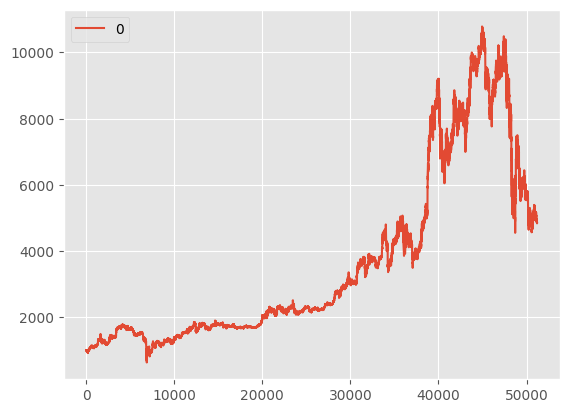

In [23]:
orDict = OrderedDict()
for k in env.action_scheme.portfolio.performance.keys():
    orDict[k] = env.action_scheme.portfolio.performance[k]["net_worth"]
pd.DataFrame().from_dict(orDict, orient='index').plot()
plt.show()

In [38]:
ray.shutdown()

In [30]:
a = "{aa}, {{abb}}"
a.format(aa="20")

'20, {abb}'

In [68]:
from ray import tune
import ray
# ray.init()

from ray.tune.registry import register_env
register_env("TradingEnv", createEnv)
from ray.tune.registry import register_env
# register_env("TradingEnv", createEnv)
config = DEFAULT_CONFIG.copy()
config["env_config"]["data"]=norm_data
config["env_config"]["window_size"]=tune.grid_search([10, 15, 30])
config["env"] = "TradingEnv"

# agent = PPOTrainer(config, 'TradingEnv')
config['model']["use_lstm"] = True
config['num_workers'] = 1

config["log_level"] = "DEBUG"


config["model"]["lstm_cell_size"] = tune.grid_search([16, 32, 62, 128, 256])
# config["model"]["max_seq_len"] = tune.grid_search([5, 10, 16, 32, 62])
config["model"]["lstm_use_prev_action"] = tune.grid_search([True, False])
config["model"]["lstm_use_prev_reward"] = tune.grid_search([True, False])

In [ ]:
# config['model']["max_seq_len"] = 32
# config['model']["lstm_cell_size"]= 256
from ray.tune.registry import register_env
register_env("TradingEnv", createEnv)
analysis = tune.run(
    "PPO",
    stop={
#           "episode_reward_mean": 500,
        "training_iteration": 10

    },
    metric="episode_reward_mean", 
    mode="max",
    config=config,
    checkpoint_at_end=True, 
#     resume=True 
)

2021-07-06 21:43:27,019	INFO tune.py:661 -- Initializing Ray automatically.For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run`.
2021-07-06 21:43:29,444	INFO services.py:1274 -- View the Ray dashboard at http://127.0.0.1:8265
(pid=25225) 2021-07-06 21:43:54,076	INFO trainer.py:671 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
(pid=25227) 2021-07-06 21:44:45,480	DEBUG worker_set.py:303 -- Creating TF session {'intra_op_parallelism_threads': 2, 'inter_op_parallelism_threads': 2, 'gpu_options': {'allow_growth': True}, 'log_device_placement': False, 'device_count': {'CPU': 1}, 'allow_soft_placement': True}
(pid=25227) 2021-07-06 21:44:45,481	DEBUG rollout_worker.py:1160 -- Creating policy for default_policy
(pid=25227) 2021-07-06 21:44:45,524	DEBUG catalog.py:710 -- Created preprocessor <ray.rllib.models.preprocessors.NoPreprocessor object at 0x237ee4490>: Box(-inf, inf, (10, 60), float32) -> (10, 60)


(pid=25227) Model: "model_1"
(pid=25227) __________________________________________________________________________________________________
(pid=25227) Layer (type)                    Output Shape         Param #     Connected to                     
(pid=25227) ==================================================================================================
(pid=25227) seq_in (InputLayer)             [(None,)]            0                                            
(pid=25227) __________________________________________________________________________________________________
(pid=25227) tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
(pid=25227) __________________________________________________________________________________________________
(pid=25227) tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
(pid=25227) _______________________________________________________________________

(pid=25227) 2021-07-06 21:44:46,598	INFO tf_policy.py:154 -- TFPolicy (worker=1) running on CPU.
(pid=25227) 2021-07-06 21:44:46,733	INFO dynamic_tf_policy.py:472 -- Testing `compute_actions` w/ dummy batch.
(pid=25227) 2021-07-06 21:44:46,736	INFO tf_run_builder.py:87 -- Executing TF run without tracing. To dump TF timeline traces to disk, set the TF_TIMELINE_DIR environment variable.
(pid=25227) 2021-07-06 21:44:47,063	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_prob` to view-reqs.
(pid=25227) 2021-07-06 21:44:47,064	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_logp` to view-reqs.
(pid=25227) 2021-07-06 21:44:47,065	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_dist_inputs` to view-reqs.
(pid=25227) 2021-07-06 21:44:47,066	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `vf_preds` to view-reqs.
(pid=25227) 2021-07-06 21:44:47,066	INFO dynamic_tf_policy.py:488 -- Testing `postprocess_trajectory` w/ dummy batc

(pid=25225) Model: "model_1"
(pid=25225) __________________________________________________________________________________________________
(pid=25225) Layer (type)                    Output Shape         Param #     Connected to                     
(pid=25225) ==================================================================================================
(pid=25225) seq_in (InputLayer)             [(None,)]            0                                            
(pid=25225) __________________________________________________________________________________________________
(pid=25225) tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
(pid=25225) __________________________________________________________________________________________________
(pid=25225) tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
(pid=25225) _______________________________________________________________________

(pid=25225) 2021-07-06 21:44:50,958	INFO tf_policy.py:154 -- TFPolicy (worker=local) running on CPU.
(pid=25225) 2021-07-06 21:44:51,182	INFO dynamic_tf_policy.py:472 -- Testing `compute_actions` w/ dummy batch.
(pid=25225) 2021-07-06 21:44:51,182	INFO tf_run_builder.py:87 -- Executing TF run without tracing. To dump TF timeline traces to disk, set the TF_TIMELINE_DIR environment variable.
(pid=25225) 2021-07-06 21:44:51,392	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_prob` to view-reqs.
(pid=25225) 2021-07-06 21:44:51,393	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_logp` to view-reqs.
(pid=25225) 2021-07-06 21:44:51,393	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_dist_inputs` to view-reqs.
(pid=25225) 2021-07-06 21:44:51,394	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `vf_preds` to view-reqs.
(pid=25225) 2021-07-06 21:44:51,394	INFO dynamic_tf_policy.py:488 -- Testing `postprocess_trajectory` w/ dummy 

(pid=25227) 2021-07-06 21:45:02,207	INFO sampler.py:1023 -- Outputs of compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': ( np.ndarray((1,), dtype=int64, min=15.0, max=15.0, mean=15.0),
(pid=25227)                       [ np.ndarray((1, 16), dtype=float32, min=-0.328, max=0.424, mean=0.008),
(pid=25227)                         np.ndarray((1, 16), dtype=float32, min=-0.637, max=0.619, mean=-0.013)],
(pid=25227)                       { 'action_dist_inputs': np.ndarray((1, 41), dtype=float32, min=-0.287, max=0.376, mean=-0.027),
(pid=25227)                         'action_logp': np.ndarray((1,), dtype=float32, min=-3.708, max=-3.708, mean=-3.708),
(pid=25227)                         'action_prob': np.ndarray((1,), dtype=float32, min=0.025, max=0.025, mean=0.025),
(pid=25227)                         'vf_preds': np.ndarray((1,), dtype=float32, min=0.181, max=0.181, mean=0.181)})}
(pid=25227) 
(pid=25227) 2021-07-06 21:45:02,943	INFO simple_list_collector.py:661 -- Trajectory fr

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len
PPO_TradingEnv_5aaa4_00000,RUNNING,,10,16,True,True,5
PPO_TradingEnv_5aaa4_00001,PENDING,,15,16,True,True,5
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5


Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len
PPO_TradingEnv_5aaa4_00000,RUNNING,,10,16,True,True,5
PPO_TradingEnv_5aaa4_00001,RUNNING,,15,16,True,True,5
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5


Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len
PPO_TradingEnv_5aaa4_00000,RUNNING,,10,16,True,True,5
PPO_TradingEnv_5aaa4_00001,RUNNING,,15,16,True,True,5
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5


Result for PPO_TradingEnv_5aaa4_00000:
  agent_timesteps_total: 4000
  custom_metrics: {}
  date: 2021-07-06_21-45-39
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 834d67c432884568b80056d0e12e90c1
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.20000000298023224
          cur_lr: 4.999999873689376e-05
          entropy: 3.700202465057373
          entropy_coeff: 0.0
          kl: 0.025436019524931908
          model: {}
          policy_loss: -0.013990623876452446
          total_loss: 0.012650690972805023
          vf_explained_var: 0.00599696347489953
          vf_loss: 0.02155410870909691
    num_agent_steps_sampled: 4000
    num_agent_steps_trained: 4000
    num_steps_sampled: 4000
    num_steps_trained: 4000
  iterations_since_restore: 1
  node_ip: 192

(pid=25226) 2021-07-06 21:45:44,704	INFO trainer.py:671 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
(pid=25228) 2021-07-06 21:45:56,993	DEBUG worker_set.py:303 -- Creating TF session {'intra_op_parallelism_threads': 2, 'inter_op_parallelism_threads': 2, 'gpu_options': {'allow_growth': True}, 'log_device_placement': False, 'device_count': {'CPU': 1}, 'allow_soft_placement': True}
(pid=25228) 2021-07-06 21:45:56,995	DEBUG rollout_worker.py:1160 -- Creating policy for default_policy
(pid=25228) 2021-07-06 21:45:57,057	DEBUG catalog.py:710 -- Created preprocessor <ray.rllib.models.preprocessors.NoPreprocessor object at 0x2347b8e10>: Box(-inf, inf, (15, 60), float32) -> (15, 60)


(pid=25228) Model: "model_1"
(pid=25228) __________________________________________________________________________________________________
(pid=25228) Layer (type)                    Output Shape         Param #     Connected to                     
(pid=25228) ==================================================================================================
(pid=25228) seq_in (InputLayer)             [(None,)]            0                                            
(pid=25228) __________________________________________________________________________________________________
(pid=25228) tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
(pid=25228) __________________________________________________________________________________________________
(pid=25228) tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
(pid=25228) _______________________________________________________________________

(pid=25228) 2021-07-06 21:45:58,250	INFO tf_policy.py:154 -- TFPolicy (worker=1) running on CPU.
(pid=25228) 2021-07-06 21:45:58,421	INFO dynamic_tf_policy.py:472 -- Testing `compute_actions` w/ dummy batch.
(pid=25228) 2021-07-06 21:45:58,421	INFO tf_run_builder.py:87 -- Executing TF run without tracing. To dump TF timeline traces to disk, set the TF_TIMELINE_DIR environment variable.
(pid=25228) 2021-07-06 21:45:58,631	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_prob` to view-reqs.
(pid=25228) 2021-07-06 21:45:58,632	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_logp` to view-reqs.
(pid=25228) 2021-07-06 21:45:58,633	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `action_dist_inputs` to view-reqs.
(pid=25228) 2021-07-06 21:45:58,634	INFO dynamic_tf_policy.py:481 -- Adding extra-action-fetch `vf_preds` to view-reqs.
(pid=25228) 2021-07-06 21:45:58,634	INFO dynamic_tf_policy.py:488 -- Testing `postprocess_trajectory` w/ dummy batc

(pid=25226) Model: "model_1"
(pid=25226) __________________________________________________________________________________________________
(pid=25226) Layer (type)                    Output Shape         Param #     Connected to                     
(pid=25226) ==================================================================================================
(pid=25226) seq_in (InputLayer)             [(None,)]            0                                            
(pid=25226) __________________________________________________________________________________________________
(pid=25226) tf_op_layer_default_policy/Sequ [()]                 0           seq_in[0][0]                     
(pid=25226) __________________________________________________________________________________________________
(pid=25226) tf_op_layer_default_policy/Sequ [()]                 0           tf_op_layer_default_policy/Sequen
(pid=25226) _______________________________________________________________________

(pid=25227) 2021-07-06 21:46:02,964	INFO sampler.py:591 -- Raw obs from env: { 0: { 'agent0': np.ndarray((10, 60), dtype=float32, min=-1.402, max=111285.938, mean=4240.245)}}
(pid=25227) 2021-07-06 21:46:02,966	INFO sampler.py:592 -- Info return from env: { 0: { 'agent0': { 'net_worth': 1467.0124812614,
(pid=25227)                    'step': 5928}}}
(pid=25227) 2021-07-06 21:46:02,966	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((10, 60), dtype=float32, min=-1.402, max=111285.938, mean=4240.245)
(pid=25227) 2021-07-06 21:46:02,967	INFO sampler.py:817 -- Filtered obs: np.ndarray((10, 60), dtype=float32, min=-1.402, max=111285.938, mean=4240.245)
(pid=25227) 2021-07-06 21:46:02,973	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25227)                                   'env_id': 0,
(pid=25227)                                   'info': { 'net_worth': 1467.0124812614,
(pid=25227)              

(pid=25226) 2021-07-06 21:46:05,897	DEBUG tf_policy.py:325 -- These tensors were used in the loss_fn:
(pid=25226) 
(pid=25226) { 'action_dist_inputs': <tf.Tensor 'default_policy/action_dist_inputs:0' shape=(?, 41) dtype=float32>,
(pid=25226)   'action_logp': <tf.Tensor 'default_policy/action_logp:0' shape=(?,) dtype=float32>,
(pid=25226)   'action_prob': <tf.Tensor 'default_policy/action_prob:0' shape=(?,) dtype=float32>,
(pid=25226)   'actions': <tf.Tensor 'default_policy/action:0' shape=(?,) dtype=int64>,
(pid=25226)   'advantages': <tf.Tensor 'default_policy/advantages:0' shape=(?,) dtype=float32>,
(pid=25226)   'dones': <tf.Tensor 'default_policy/dones:0' shape=(?,) dtype=float32>,
(pid=25226)   'new_obs': <tf.Tensor 'default_policy/new_obs:0' shape=(?, 15, 60) dtype=float32>,
(pid=25226)   'obs': <tf.Tensor 'default_policy/obs:0' shape=(?, 15, 60) dtype=float32>,
(pid=25226)   'prev_actions': <tf.Tensor 'default_policy/prev_actions:0' shape=(?,) dtype=int64>,
(pid=25226)   'prev_r

(pid=25225) 2021-07-06 21:46:29,705	INFO rnn_sequencing.py:139 -- Padded input for RNN/Attn.Nets/MA:
(pid=25225) 
(pid=25225) { 'features': [ np.ndarray((4000, 10, 60), dtype=float32, min=-31483.492, max=1098872.5, mean=4252.23),
(pid=25225)                 np.ndarray((4000,), dtype=int64, min=0.0, max=40.0, mean=19.573),
(pid=25225)                 np.ndarray((4000,), dtype=int64, min=0.0, max=40.0, mean=19.575),
(pid=25225)                 np.ndarray((4000,), dtype=float32, min=-0.119, max=0.198, mean=-0.0),
(pid=25225)                 np.ndarray((4000,), dtype=float32, min=-0.119, max=0.198, mean=-0.0),
(pid=25225)                 np.ndarray((4000,), dtype=bool, min=0.0, max=0.0, mean=0.0),
(pid=25225)                 np.ndarray((4000,), dtype=float32, min=-4.292, max=-3.225, mean=-3.7),
(pid=25225)                 np.ndarray((4000, 41), dtype=float32, min=-0.763, max=0.583, mean=-0.025),
(pid=25225)                 np.ndarray((4000,), dtype=float32, min=-0.111, max=0.346, mean=0.11

Result for PPO_TradingEnv_5aaa4_00000:
  agent_timesteps_total: 8000
  custom_metrics: {}
  date: 2021-07-06_21-46-41
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 834d67c432884568b80056d0e12e90c1
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.686875343322754
          entropy_coeff: 0.0
          kl: 0.012719170190393925
          model: {}
          policy_loss: -0.04779733717441559
          total_loss: -0.040094662457704544
          vf_explained_var: -0.8157675862312317
          vf_loss: 0.0038869252894073725
    num_agent_steps_sampled: 8000
    num_agent_steps_trained: 8000
    num_steps_sampled: 8000
    num_steps_trained: 8000
  iterations_since_restore: 2
  node_ip: 1

2021-07-06 21:46:42,623	WARNING util.py:162 -- The `process_trial_result` operation took 0.659 s, which may be a performance bottleneck.
2021-07-06 21:46:42,626	WARNING util.py:162 -- Processing trial results took 0.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2021-07-06 21:46:42,630	WARNING util.py:162 -- The `process_trial` operation took 0.686 s, which may be a performance bottleneck.


Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,2,99.8883,8000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,,15,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25226) 2021-07-06 21:46:48,974	INFO tf_policy.py:692 -- Optimizing variable <tf.Variable 'default_policy/fc_1/kernel:0' shape=(900, 256) dtype=float32>
(pid=25226) 2021-07-06 21:46:48,974	INFO tf_policy.py:692 -- Optimizing variable <tf.Variable 'default_policy/fc_1/bias:0' shape=(256,) dtype=float32>
(pid=25226) 2021-07-06 21:46:48,974	INFO tf_policy.py:692 -- Optimizing variable <tf.Variable 'default_policy/fc_2/kernel:0' shape=(256, 256) dtype=float32>
(pid=25226) 2021-07-06 21:46:48,974	INFO tf_policy.py:692 -- Optimizing variable <tf.Variable 'default_policy/fc_2/bias:0' shape=(256,) dtype=float32>
(pid=25226) 2021-07-06 21:46:48,974	INFO tf_policy.py:692 -- Optimizing variable <tf.Variable 'default_policy/lstm/lstm_cell/kernel:0' shape=(298, 64) dtype=float32>
(pid=25226) 2021-07-06 21:46:48,974	INFO tf_policy.py:692 -- Optimizing variable <tf.Variable 'default_policy/lstm/lstm_cell/recurrent_kernel:0' shape=(16, 64) dtype=float32>
(pid=25226) 2021-07-06 21:46:48,974	INFO tf

Result for PPO_TradingEnv_5aaa4_00001:
  agent_timesteps_total: 4000
  custom_metrics: {}
  date: 2021-07-06_21-47-03
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ca8561777d5b4b408c18a0ec29d5696b
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.20000000298023224
          cur_lr: 4.999999873689376e-05
          entropy: 3.6973869800567627
          entropy_coeff: 0.0
          kl: 0.02782389707863331
          model: {}
          policy_loss: -0.004239772446453571
          total_loss: 0.03100641630589962
          vf_explained_var: 0.019269751384854317
          vf_loss: 0.029681410640478134
    num_agent_steps_sampled: 4000
    num_agent_steps_trained: 4000
    num_steps_sampled: 4000
    num_steps_trained: 4000
  iterations_since_restore: 1
  node_ip: 19

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,2,99.8883,8000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,1,49.1752,4000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25227) 2021-07-06 21:47:04,241	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((10, 60), dtype=float32, min=-1.438, max=141938.453, mean=4806.675)
(pid=25227) 2021-07-06 21:47:04,242	INFO sampler.py:817 -- Filtered obs: np.ndarray((10, 60), dtype=float32, min=-1.438, max=141938.453, mean=4806.675)
(pid=25227) 2021-07-06 21:47:04,243	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25227)                                   'env_id': 0,
(pid=25227)                                   'info': { 'net_worth': 1159.550858647738,
(pid=25227)                                             'step': 8792},
(pid=25227)                                   'obs': np.ndarray((10, 60), dtype=float32, min=-1.438, max=141938.453, mean=4806.675),
(pid=25227)                                   'prev_action': 28,
(pid=25227)                                   'prev_reward': -0.0068913169406548125,
(pid=25227)          

(pid=25228) 2021-07-06 21:47:16,792	INFO simple_list_collector.py:661 -- Trajectory fragment after postprocess_trajectory():
(pid=25228) 
(pid=25228) { 'agent0': { 'action_dist_inputs': np.ndarray((200, 41), dtype=float32, min=-0.611, max=0.719, mean=-0.001),
(pid=25228)               'action_logp': np.ndarray((200,), dtype=float32, min=-4.252, max=-3.26, mean=-3.698),
(pid=25228)               'actions': np.ndarray((200,), dtype=int64, min=0.0, max=40.0, mean=21.55),
(pid=25228)               'advantages': np.ndarray((200,), dtype=float32, min=-0.059, max=0.329, mean=0.116),
(pid=25228)               'agent_index': np.ndarray((200,), dtype=int64, min=0.0, max=0.0, mean=0.0),
(pid=25228)               'dones': np.ndarray((200,), dtype=bool, min=0.0, max=0.0, mean=0.0),
(pid=25228)               'eps_id': np.ndarray((200,), dtype=int64, min=267866790.0, max=267866790.0, mean=267866790.0),
(pid=25228)               'infos': np.ndarray((200,), dtype=object, head={'step': 5201, 'net_worth'

(pid=25227) 2021-07-06 21:48:04,527	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((10, 60), dtype=float32, min=-1.203, max=82354.094, mean=2943.902)
(pid=25227) 2021-07-06 21:48:04,528	INFO sampler.py:817 -- Filtered obs: np.ndarray((10, 60), dtype=float32, min=-1.203, max=82354.094, mean=2943.902)
(pid=25227) 2021-07-06 21:48:04,529	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25227)                                   'env_id': 0,
(pid=25227)                                   'info': { 'net_worth': 1676.5398130628,
(pid=25227)                                             'step': 11558},
(pid=25227)                                   'obs': np.ndarray((10, 60), dtype=float32, min=-1.203, max=82354.094, mean=2943.902),
(pid=25227)                                   'prev_action': 9,
(pid=25227)                                   'prev_reward': 0.004805046381174627,
(pid=25227)                 

Result for PPO_TradingEnv_5aaa4_00001:
  agent_timesteps_total: 8000
  custom_metrics: {}
  date: 2021-07-06_21-48-08
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ca8561777d5b4b408c18a0ec29d5696b
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.691011905670166
          entropy_coeff: 0.0
          kl: 0.009547153487801552
          model: {}
          policy_loss: -0.0267786867916584
          total_loss: -0.01466041523963213
          vf_explained_var: -0.23813757300376892
          vf_loss: 0.009254123084247112
    num_agent_steps_sampled: 8000
    num_agent_steps_trained: 8000
    num_steps_sampled: 8000
    num_steps_trained: 8000
  iterations_since_restore: 2
  node_ip: 192

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,2,99.8883,8000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,2,113.206,8000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25228) 2021-07-06 21:48:16,804	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((15, 60), dtype=float32, min=-1.825, max=103924.867, mean=2825.171)
(pid=25228) 2021-07-06 21:48:16,805	INFO sampler.py:817 -- Filtered obs: np.ndarray((15, 60), dtype=float32, min=-1.825, max=103924.867, mean=2825.171)
(pid=25228) 2021-07-06 21:48:16,823	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25228) 
(pid=25228) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25228)                                   'env_id': 0,
(pid=25228)                                   'info': { 'net_worth': 1458.767735060202,
(pid=25228)                                             'step': 8476},
(pid=25228)                                   'obs': np.ndarray((15, 60), dtype=float32, min=-1.825, max=103924.867, mean=2825.171),
(pid=25228)                                   'prev_action': 14,
(pid=25228)                                   'prev_reward': -0.002949970101654431,
(pid=25228)           

Result for PPO_TradingEnv_5aaa4_00000:
  agent_timesteps_total: 12000
  custom_metrics: {}
  date: 2021-07-06_21-48-30
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 834d67c432884568b80056d0e12e90c1
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.668748378753662
          entropy_coeff: 0.0
          kl: 0.013344019651412964
          model: {}
          policy_loss: -0.038638681173324585
          total_loss: -0.03145468607544899
          vf_explained_var: -0.7831448912620544
          vf_loss: 0.003180790226906538
    num_agent_steps_sampled: 12000
    num_agent_steps_trained: 12000
    num_steps_sampled: 12000
    num_steps_trained: 12000
  iterations_since_restore: 3
  node_i

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,3,208.121,12000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,2,113.206,8000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25227) 2021-07-06 21:49:06,853	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((10, 60), dtype=float32, min=-1.695, max=101381.25, mean=3350.02)
(pid=25227) 2021-07-06 21:49:06,853	INFO sampler.py:817 -- Filtered obs: np.ndarray((10, 60), dtype=float32, min=-1.695, max=101381.25, mean=3350.02)
(pid=25227) 2021-07-06 21:49:06,855	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25227)                                   'env_id': 0,
(pid=25227)                                   'info': { 'net_worth': 1855.5617836077,
(pid=25227)                                             'step': 13396},
(pid=25227)                                   'obs': np.ndarray((10, 60), dtype=float32, min=-1.695, max=101381.25, mean=3350.02),
(pid=25227)                                   'prev_action': 14,
(pid=25227)                                   'prev_reward': -0.00025198592566422207,
(pid=25227)                

(pid=25228) 2021-07-06 21:49:21,513	INFO simple_list_collector.py:661 -- Trajectory fragment after postprocess_trajectory():
(pid=25228) 
(pid=25228) { 'agent0': { 'action_dist_inputs': np.ndarray((200, 41), dtype=float32, min=-0.681, max=0.627, mean=0.007),
(pid=25228)               'action_logp': np.ndarray((200,), dtype=float32, min=-4.288, max=-3.155, mean=-3.695),
(pid=25228)               'actions': np.ndarray((200,), dtype=int64, min=0.0, max=40.0, mean=18.995),
(pid=25228)               'advantages': np.ndarray((200,), dtype=float32, min=-0.059, max=0.2, mean=0.079),
(pid=25228)               'agent_index': np.ndarray((200,), dtype=int64, min=0.0, max=0.0, mean=0.0),
(pid=25228)               'dones': np.ndarray((200,), dtype=bool, min=0.0, max=0.0, mean=0.0),
(pid=25228)               'eps_id': np.ndarray((200,), dtype=int64, min=267866790.0, max=267866790.0, mean=267866790.0),
(pid=25228)               'infos': np.ndarray((200,), dtype=object, head={'step': 11201, 'net_worth'

Result for PPO_TradingEnv_5aaa4_00001:
  agent_timesteps_total: 12000
  custom_metrics: {}
  date: 2021-07-06_21-49-43
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ca8561777d5b4b408c18a0ec29d5696b
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.670205593109131
          entropy_coeff: 0.0
          kl: 0.010054918937385082
          model: {}
          policy_loss: -0.03477063030004501
          total_loss: -0.027387380599975586
          vf_explained_var: -0.9282627105712891
          vf_loss: 0.004366767592728138
    num_agent_steps_sampled: 12000
    num_agent_steps_trained: 12000
    num_steps_sampled: 12000
    num_steps_trained: 12000
  iterations_since_restore: 3
  node_i

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,3,208.121,12000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,3,208.736,12000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25227) 2021-07-06 21:50:06,981	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((10, 60), dtype=float32, min=-1.398, max=46061.191, mean=2162.875)
(pid=25227) 2021-07-06 21:50:06,982	INFO sampler.py:817 -- Filtered obs: np.ndarray((10, 60), dtype=float32, min=-1.398, max=46061.191, mean=2162.875)
(pid=25227) 2021-07-06 21:50:06,983	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25227)                                   'env_id': 0,
(pid=25227)                                   'info': { 'net_worth': 1768.0957851324947,
(pid=25227)                                             'step': 15758},
(pid=25227)                                   'obs': np.ndarray((10, 60), dtype=float32, min=-1.398, max=46061.191, mean=2162.875),
(pid=25227)                                   'prev_action': 34,
(pid=25227)                                   'prev_reward': 9.622960383470769e-05,
(pid=25227)            

(pid=25228) 2021-07-06 21:50:21,529	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((15, 60), dtype=float32, min=-0.825, max=60952.379, mean=2824.426)
(pid=25228) 2021-07-06 21:50:21,530	INFO sampler.py:817 -- Filtered obs: np.ndarray((15, 60), dtype=float32, min=-0.825, max=60952.379, mean=2824.426)
(pid=25228) 2021-07-06 21:50:21,531	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25228) 
(pid=25228) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25228)                                   'env_id': 0,
(pid=25228)                                   'info': { 'net_worth': 1740.4357949946002,
(pid=25228)                                             'step': 13784},
(pid=25228)                                   'obs': np.ndarray((15, 60), dtype=float32, min=-0.825, max=60952.379, mean=2824.426),
(pid=25228)                                   'prev_action': 14,
(pid=25228)                                   'prev_reward': 0.002466720537575018,
(pid=25228)             

Result for PPO_TradingEnv_5aaa4_00000:
  agent_timesteps_total: 16000
  custom_metrics: {}
  date: 2021-07-06_21-50-22
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 834d67c432884568b80056d0e12e90c1
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.652282953262329
          entropy_coeff: 0.0
          kl: 0.013564432971179485
          model: {}
          policy_loss: -0.03976481035351753
          total_loss: -0.03343893587589264
          vf_explained_var: -0.962289035320282
          vf_loss: 0.0022565315011888742
    num_agent_steps_sampled: 16000
    num_agent_steps_trained: 16000
    num_steps_sampled: 16000
    num_steps_trained: 16000
  iterations_since_restore: 4
  node_ip

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,4,319.716,16000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,3,208.736,12000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25227) 2021-07-06 21:51:08,105	INFO sampler.py:813 -- Preprocessed obs: np.ndarray((10, 60), dtype=float32, min=-1.921, max=23965.301, mean=1763.399)
(pid=25227) 2021-07-06 21:51:08,106	INFO sampler.py:817 -- Filtered obs: np.ndarray((10, 60), dtype=float32, min=-1.921, max=23965.301, mean=1763.399)
(pid=25227) 2021-07-06 21:51:08,107	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25227) 
(pid=25227) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25227)                                   'env_id': 0,
(pid=25227)                                   'info': { 'net_worth': 1637.4384137056788,
(pid=25227)                                             'step': 17756},
(pid=25227)                                   'obs': np.ndarray((10, 60), dtype=float32, min=-1.921, max=23965.301, mean=1763.399),
(pid=25227)                                   'prev_action': 9,
(pid=25227)                                   'prev_reward': 5.1951762788160494e-05,
(pid=25227)            

Result for PPO_TradingEnv_5aaa4_00001:
  agent_timesteps_total: 16000
  custom_metrics: {}
  date: 2021-07-06_21-51-23
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ca8561777d5b4b408c18a0ec29d5696b
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.664738416671753
          entropy_coeff: 0.0
          kl: 0.010344280861318111
          model: {}
          policy_loss: -0.03738341107964516
          total_loss: -0.030311385169625282
          vf_explained_var: -0.8050626516342163
          vf_loss: 0.003968733828514814
    num_agent_steps_sampled: 16000
    num_agent_steps_trained: 16000
    num_steps_sampled: 16000
    num_steps_trained: 16000
  iterations_since_restore: 4
  node_i

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,4,319.716,16000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,4,308.239,16000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25228) 2021-07-06 21:51:23,690	INFO sampler.py:1005 -- Inputs to compute_actions():
(pid=25228) 
(pid=25228) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(pid=25228)                                   'env_id': 0,
(pid=25228)                                   'info': { 'net_worth': 1756.7539957792,
(pid=25228)                                             'step': 16000},
(pid=25228)                                   'obs': np.ndarray((15, 60), dtype=float32, min=-1.333, max=87865.602, mean=2308.978),
(pid=25228)                                   'prev_action': 14,
(pid=25228)                                   'prev_reward': 0.00033636057854025125,
(pid=25228)                                   'rnn_state': [ np.ndarray((16,), dtype=float32, min=-0.262, max=0.8, mean=0.134),
(pid=25228)                                                  np.ndarray((16,), dtype=float32, min=-0.811, max=2.236, mean=0.258)]},
(pid=25228)                         'type': 'PolicyEvalData'}]}
(pid=25

(pid=25227) 2021-07-06 21:52:13,570	INFO simple_list_collector.py:661 -- Trajectory fragment after postprocess_trajectory():
(pid=25227) 
(pid=25227) { 'agent0': { 'action_dist_inputs': np.ndarray((200, 41), dtype=float32, min=-1.182, max=1.166, mean=-0.01),
(pid=25227)               'action_logp': np.ndarray((200,), dtype=float32, min=-4.76, max=-2.847, mean=-3.625),
(pid=25227)               'actions': np.ndarray((200,), dtype=int64, min=0.0, max=40.0, mean=19.4),
(pid=25227)               'advantages': np.ndarray((200,), dtype=float32, min=-0.087, max=0.166, mean=0.039),
(pid=25227)               'agent_index': np.ndarray((200,), dtype=int64, min=0.0, max=0.0, mean=0.0),
(pid=25227)               'dones': np.ndarray((200,), dtype=bool, min=0.0, max=0.0, mean=0.0),
(pid=25227)               'eps_id': np.ndarray((200,), dtype=int64, min=772733759.0, max=772733759.0, mean=772733759.0),
(pid=25227)               'infos': np.ndarray((200,), dtype=object, head={'step': 19601, 'net_worth':

Result for PPO_TradingEnv_5aaa4_00000:
  agent_timesteps_total: 20000
  custom_metrics: {}
  date: 2021-07-06_21-52-30
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 834d67c432884568b80056d0e12e90c1
  hostname: Studios-iMac-3.local
  info:
    learner:
      default_policy:
        learner_stats:
          cur_kl_coeff: 0.30000001192092896
          cur_lr: 4.999999873689376e-05
          entropy: 3.6438608169555664
          entropy_coeff: 0.0
          kl: 0.014634430408477783
          model: {}
          policy_loss: -0.04408232122659683
          total_loss: -0.03751102834939957
          vf_explained_var: -1.0
          vf_loss: 0.0021809665486216545
    num_agent_steps_sampled: 20000
    num_agent_steps_trained: 20000
    num_steps_sampled: 20000
    num_steps_trained: 20000
  iterations_since_restore: 5
  node_ip: 192.168.0.1

Trial name,status,loc,env_config/window_size,model/lstm_cell_size,model/lstm_use_prev_action,model/lstm_use_prev_reward,model/max_seq_len,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
PPO_TradingEnv_5aaa4_00000,RUNNING,192.168.0.15:25225,10,16,True,True,5,5,447.038,20000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00001,RUNNING,192.168.0.15:25226,15,16,True,True,5,4,308.239,16000,nan,nan,nan,nan
PPO_TradingEnv_5aaa4_00002,PENDING,,30,16,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00003,PENDING,,10,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00004,PENDING,,15,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00005,PENDING,,30,32,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00006,PENDING,,10,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00007,PENDING,,15,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00008,PENDING,,30,62,True,True,5,,,,,,,
PPO_TradingEnv_5aaa4_00009,PENDING,,10,128,True,True,5,,,,,,,


(pid=25228) 2021-07-06 21:52:31,907	INFO simple_list_collector.py:661 -- Trajectory fragment after postprocess_trajectory():
(pid=25228) 
(pid=25228) { 'agent0': { 'action_dist_inputs': np.ndarray((200, 41), dtype=float32, min=-0.88, max=0.881, mean=-0.038),
(pid=25228)               'action_logp': np.ndarray((200,), dtype=float32, min=-4.44, max=-2.899, mean=-3.656),
(pid=25228)               'actions': np.ndarray((200,), dtype=int64, min=0.0, max=40.0, mean=19.55),
(pid=25228)               'advantages': np.ndarray((200,), dtype=float32, min=-0.195, max=0.148, mean=-0.035),
(pid=25228)               'agent_index': np.ndarray((200,), dtype=int64, min=0.0, max=0.0, mean=0.0),
(pid=25228)               'dones': np.ndarray((200,), dtype=bool, min=0.0, max=0.0, mean=0.0),
(pid=25228)               'eps_id': np.ndarray((200,), dtype=int64, min=267866790.0, max=267866790.0, mean=267866790.0),
(pid=25228)               'infos': np.ndarray((200,), dtype=object, head={'step': 18401, 'net_worth

In [67]:
ray.shutdown()

In [ ]:
config

In [ ]:
import ray.rllib.agents.ppo as ppo

# # Get checkpoint
checkpoints = analysis.get_trial_checkpoints_paths(
    trial=analysis.get_best_trial("episode_reward_mean", mode="max"),
    metric="episode_reward_mean"
)
checkpoint_path = checkpoints[0][0]
# Restore agent
agent = ppo.PPOTrainer(
    env="TradingEnv",
    config=config
)
agent.restore(checkpoint_path)



In [46]:
env = createEnv({
    "window_size": 10, 
    "data": norm_data
})

In [50]:
config_env = {}
config_env["data"] = norm_data
config_env["window_size"] = 10
env = createEnv(config_env)
obs = env.reset()
done = False
cumulative_reward = 0
# https://github.com/ray-project/ray/issues/9220
# ver cell_size
policy = agent.get_policy()
cellsize=256
state=[np.zeros(cellsize, np.float32),
       np.zeros(cellsize, np.float32)]
# state = policy.get_initial_state()
# , prev_action=0, prev_reward=0
actions=np.zeros(2*16, np.float32).reshape(2,16)
rewards=np.zeros(16, np.float32)
episode_reward =0
while not done:
#     print("before")
# #     print(state)
#     action, state, logits = policy.compute_single_action(obs, state)
#     state, reward, done, _ = env.step(action)
#     cumulative_reward += reward
#     print(state)
    action, state, logits = agent.compute_action(obs, state)
    obs, reward, done, info = env.step(action)
    actions[:,:-1] = actions[:,1:]
    actions[:, -1] = action
    rewards[:-1] = rewards[1:]
    rewards[-1] = reward
    episode_reward += reward



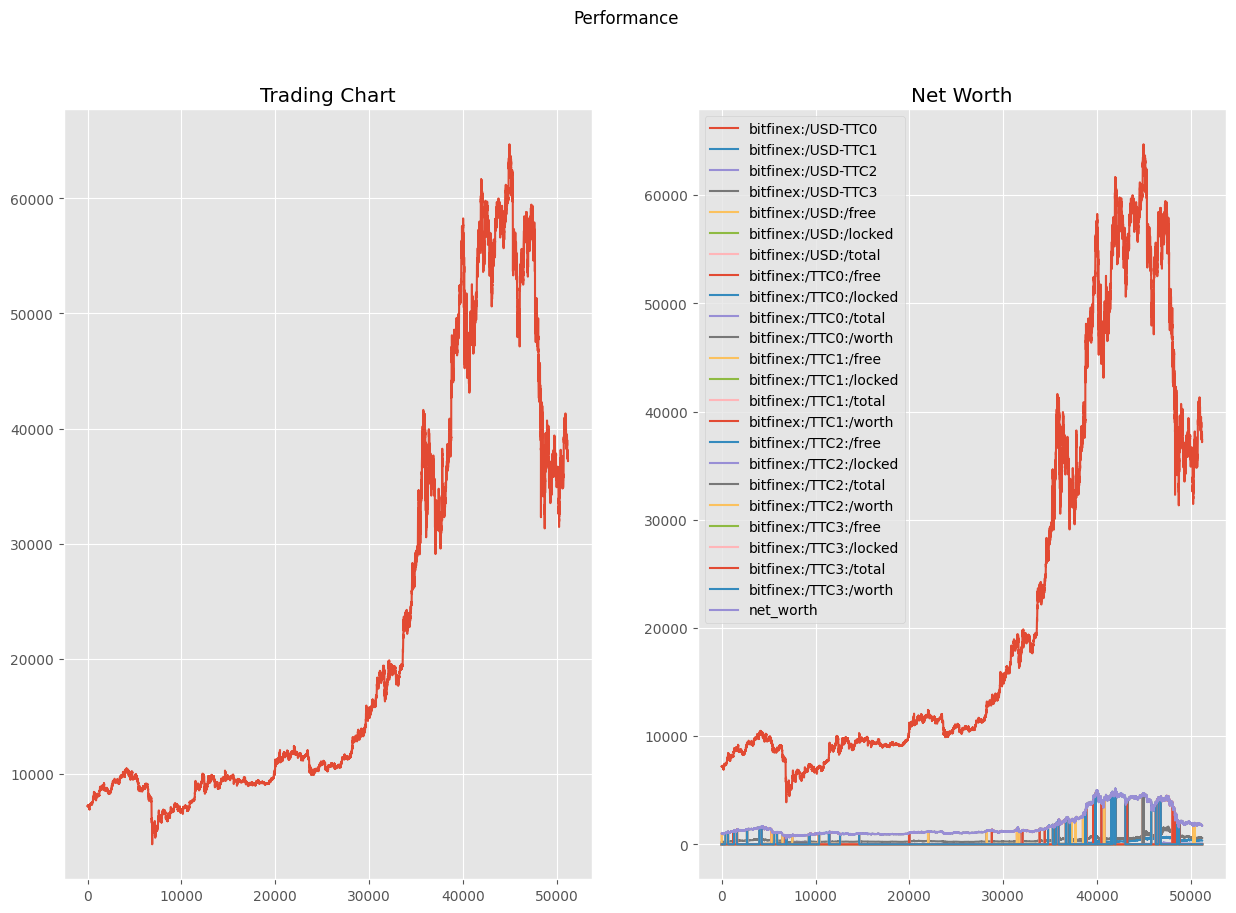

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

fig.suptitle("Performance")

axs[0].plot(np.arange(len(data["coin0:close"])), data["coin0:close"], label="price")
axs[0].set_title("Trading Chart")

performance_df = pd.DataFrame().from_dict(env.action_scheme.portfolio.performance, orient='index')
performance_df.plot(ax=axs[1])
axs[1].set_title("Net Worth")

plt.show()

In [52]:
orDict = OrderedDict()
for k in env.action_scheme.portfolio.performance.keys():
    orDict[k] = env.action_scheme.portfolio.performance[k]["net_worth"]

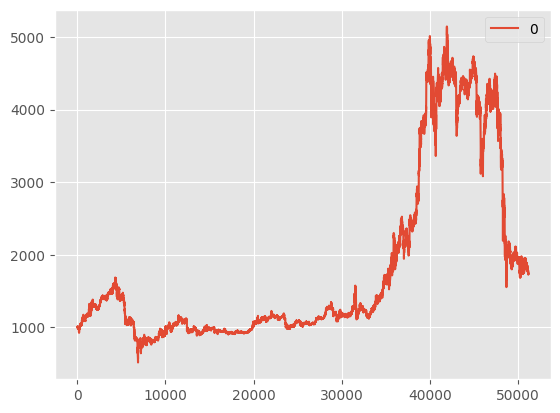

In [53]:
pd.DataFrame().from_dict(orDict, orient='index').plot()
plt.show()

In [54]:
config

{'num_workers': 3,
 'num_envs_per_worker': 1,
 'create_env_on_driver': False,
 'rollout_fragment_length': 200,
 'batch_mode': 'truncate_episodes',
 'train_batch_size': 4000,
 'model': {'_use_default_native_models': False,
  'fcnet_hiddens': [256, 256],
  'fcnet_activation': 'tanh',
  'conv_filters': None,
  'conv_activation': 'relu',
  'post_fcnet_hiddens': [],
  'post_fcnet_activation': 'relu',
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': False,
  'use_lstm': True,
  'max_seq_len': 32,
  'lstm_cell_size': 256,
  'lstm_use_prev_action': False,
  'lstm_use_prev_reward': False,
  '_time_major': False,
  'use_attention': False,
  'attention_num_transformer_units': 1,
  'attention_dim': 64,
  'attention_num_heads': 1,
  'attention_head_dim': 32,
  'attention_memory_inference': 50,
  'attention_memory_training': 50,
  'attention_position_wise_mlp_dim': 32,
  'attention_init_gru_gate_bias': 2.0,
  'attention_use_n_prev_actions': 0,
  'attention_use_n_prev_rewards